Análisis de datos en salud
============================

Unidad 5
-----------------------------------------------------



## Dataset de demencia

Los datos de este dataset contiene información de características cerebrales obtenidas a partir de estudios de resonancia magnética estructural (en inglés, *structural magnetic resonance* (sMR)).

Estos datos forman parte del estudio descrito en el artículo:

`Battineni, Gopi; Amenta, Francesco; Chintalapudi, Nalini (2019), “Data for: MACHINE LEARNING IN MEDICINE: CLASSIFICATION AND PREDICTION OF DEMENTIA BY SUPPORT VECTOR MACHINES (SVM)”, Mendeley Data, V1, doi: 10.17632/tsy6rbc5d4.1`


### Demencia

La demencia es un síndrome caracterizado por el deterioro de la función cognitiva más allá de lo que podría esperarse del envejecimiento normal. Afecta la memoria, el pensamiento, la orientación, la comprensión, el cálculo, la capacidad de aprendizaje, el lenguaje y el juicio. El deterioro de la función cognitiva suele ir acompañado y en ocasiones precedido por un deterioro del control emocional, el comportamiento social o la motivación.

La demencia es el resultado de una variedad de enfermedades y lesiones que afectan primaria o secundariamente al cerebro, como la enfermedad de Alzheimer o el accidente cerebrovascular.

Es una de las principales causas de discapacidad y dependencia entre las personas mayores en todo el mundo. Puede resultar abrumador, no sólo para las personas que lo padecen, sino también para sus cuidadores y familiares. A menudo hay una falta de conciencia y comprensión sobre la demencia, lo que genera estigmatización y barreras para el diagnóstico y la atención.

### Dataset

Las características principales del estudio son las siguientes:
- El dataset `dementia_dataset.csv` consta de una colección longitudinal de 150 participantes de entre 60 y 96 años.
- Cada participante fue escaneado en dos o más visitas, separadas por al menos un año para un total de 373 sesiones de imágenes.
- Para cada uno, se incluyen varias exploraciones de resonancia magnética ponderadas en T1 individuales.
- Todos los participantes son diestros e incluyen tanto hombres como mujeres.
- El estudio incluye tanto participantes no dementes como participantes dementes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoramos los warnings
import warnings
warnings.filterwarnings('ignore')

# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos
%cd /content/drive/MyDrive/Data Health/5/dementia_dataset.csv

Mounted at /content/drive
[Errno 20] Not a directory: '/content/drive/MyDrive/Data Health/5/dementia_dataset.csv'
/content


### Ejercicio 1

**(1 punto)**

 a) Primero de todo vamos a explorar un poco el dataset `dementia_dataset.csv`. Carga los datos y muestra su tamaño y el nombre de las columnas. Muestra también por pantalla las 5 primeras filas. **(0.25 puntos)**



In [36]:
df_dementia_dataset = pd.read_csv('/content/drive/MyDrive/Data Health/5/dementia_dataset.csv', sep=",")
df_dementia_dataset.head(5)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034

In [37]:
df_dementia_dataset.tail(5)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317

In [38]:
df_dementia_dataset.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [39]:
df_dementia_dataset.info()
# df_dementia_dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


b) ¿Hay algún valor perdido (*missing*) (NaN) o fila duplicada en el dataset? Si los hay, corrígelo de la manera que te parezca más adecuada. **(0.25 puntos)**



In [40]:
# NaN
df_dementia_dataset.isnull()

Subject ID  MRI ID  Group  Visit  MR Delay    M/F   Hand    Age   EDUC  \
0         False   False  False  False     False  False  False  False  False   
1         False   False  False  False     False  False  False  False  False   
2         False   False  False  False     False  False  False  False  False   
3         False   False  False  False     False  False  False  False  False   
4         False   False  False  False     False  False  False  False  False   
..          ...     ...    ...    ...       ...    ...    ...    ...    ...   
368       False   False  False  False     False  False  False  False  False   
369       False   False  False  False     False  False  False  False  False   
370       False   False  False  False     False  False  False  False  False   
371       False   False  False  False     False  False  False  False  False   
372       False   False  False  False     False  False  False  False  False   

       SES   MMSE    CDR   eTIV   nWBV    ASF  
0    False  False  False  False  False  False  
1    False  False  False  False  False  False  
2     True  False  False  False  False  False  
3     True  False  False  False  False  False  
4     True  False  False  False  False  False  
..     ...    ...    ...    ...    ...    ...  
368  False  False  False  False  False  False  
369  False  False  False  False  False  False  
370  False  False  False  False  False  False  
371  False  False  False  False  False  False  
372  False  False  False  False  False  False  

[373 rows x 15 columns]

In [41]:
# NaN
df_dementia_dataset.isnull().sum()

# OR :
# missing_values = df_dementia_dataset.isnull().sum()
#print(f"Total missing values (NaN/None): {missing_values}")

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [42]:
# HIGHLIGHTED NaNs
df_dementia_dataset.isnull().sum()
df_dementia_dataset.style.highlight_null(color="#DDA0DD")

In [43]:
# SES column
df_dementia_dataset['SES'].values

# OR:
# df_dementia_dataset['SES']

array([ 2.,  2., nan, nan, nan,  3.,  3.,  4.,  4.,  4., nan, nan, nan,
        2.,  2.,  2.,  2.,  3.,  3.,  2.,  2.,  2.,  4.,  4.,  4.,  3.,
        3.,  4.,  4.,  3.,  3.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  3.,  3.,  4.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,
        2.,  4.,  4.,  1.,  1.,  3.,  3.,  3.,  3.,  3.,  1.,  1.,  1.,
        1.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  2.,  2.,
        4.,  4.,  4.,  1.,  1.,  1.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,
        1.,  1.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,
        3.,  4.,  4.,  1.,  1.,  1.,  2.,  2.,  3.,  3.,  1.,  1.,  3.,
        3.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  1.,  1.,
        1.,  2.,  2.,  2., nan, nan,  5.,  5.,  5.,  1.,  1.,  4.,  4.,
        4.,  4.,  3.,  3.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        3.,  3.,  3.,  3.,  3.,  5.,  5.,  2.,  2.,  2.,  2.,  2.,  1.,
        1.,  1.,  4.,  4.,  4.,  2.,  2.,  2.,  4.,  4.,  5.,  5

In [44]:
# MMSE column
df_dementia_dataset['MMSE'].values

# OR:
# df_dementia_dataset['MMSE']

array([27., 30., 23., 28., 22., 28., 27., 28., 29., 30., 28., 27., 27.,
       30., 29., 27., 24., 30., 29., 29., 29., 29., 30., 30., 29., 21.,
       16., 25., 23., 29., 27., 30., 27., 30., 29., 27., 29., 28., 26.,
       26., 25., 30., 29., 21., 21., 27., 27., 29., 30., 30., 30., 22.,
       21., 29., 30., 30., 30., 30., 30., 28., 21., 24., 29., 30., 30.,
       30., 30., 27., 30., 30., 30., 29., 27., 29., 26., 26., 26., 25.,
       25., 27., 23., 27., 28., 28., 29., 29., 26., 26., 21., 15., 22.,
       30., 29., 20., 22., 29., 27., 19., 21., 19.,  7.,  4., 30., 30.,
       30., 20., 17., 29., 29., 30., 29., 30., 29., 28., 29., 24., 29.,
       27., 28., 30., 30., 29., 30., 30., 26., 29., 29., 28., 30., 30.,
       30., 29., 30., 29., 30., 27., 23., 26., 18., 30., 30., 30., 29.,
       29., 28., 30., 29., 29., 30., 28., 29., 29., 30., 30., 27., 28.,
       29., 28., 28., 29., 29., 25., 22., 30., 29., 30., 28., 29., 28.,
       28., 30., 23., 16., 16., 25., 30., 28., 26., 26., 29., 27

In [45]:
# NEW COPY TO TREAT THESE NaNs
df_dementia_dataset_treated = df_dementia_dataset.copy()

In [46]:
# Tratamos los valores nulos
# Sustituímos por mediana o valor más frecuente
df_dementia_dataset_treated["SES"].fillna(df_dementia_dataset_treated["SES"].mode()[0], inplace = True)
df_dementia_dataset_treated["MMSE"].fillna(df_dementia_dataset_treated["MMSE"].mean(), inplace = True)

In [47]:
# NaN
df_dementia_dataset_treated.isnull()

Subject ID  MRI ID  Group  Visit  MR Delay    M/F   Hand    Age   EDUC  \
0         False   False  False  False     False  False  False  False  False   
1         False   False  False  False     False  False  False  False  False   
2         False   False  False  False     False  False  False  False  False   
3         False   False  False  False     False  False  False  False  False   
4         False   False  False  False     False  False  False  False  False   
..          ...     ...    ...    ...       ...    ...    ...    ...    ...   
368       False   False  False  False     False  False  False  False  False   
369       False   False  False  False     False  False  False  False  False   
370       False   False  False  False     False  False  False  False  False   
371       False   False  False  False     False  False  False  False  False   
372       False   False  False  False     False  False  False  False  False   

       SES   MMSE    CDR   eTIV   nWBV    ASF  
0    False  False  False  False  False  False  
1    False  False  False  False  False  False  
2    False  False  False  False  False  False  
3    False  False  False  False  False  False  
4    False  False  False  False  False  False  
..     ...    ...    ...    ...    ...    ...  
368  False  False  False  False  False  False  
369  False  False  False  False  False  False  
370  False  False  False  False  False  False  
371  False  False  False  False  False  False  
372  False  False  False  False  False  False  

[373 rows x 15 columns]

In [48]:
df_dementia_dataset_treated.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  2.0  23.0  0.5  1678  0.736  1.046  
3  2.0  28.0  0.5  1738  0.713  1.010  
4  2.0  22.0  0.5  1698  0.701  1.034

In [49]:
# CHECK FOR DUPLICATES
print("\nNúmero de filas duplicadas:", df_dementia_dataset_treated.duplicated().sum())


Número de filas duplicadas: 0


In [50]:
# CHECK AGAIN & ELIMINATE
df_dementia_dataset_treated_copy = df_dementia_dataset_treated.drop_duplicates()
print("Número de filas después de eliminar duplicados:", len(df_dementia_dataset_treated_copy))

Número de filas después de eliminar duplicados: 373


In [51]:
# NaN
df_dementia_dataset_treated_copy.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [52]:
df_dementia_dataset_treated_copy.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  2.0  23.0  0.5  1678  0.736  1.046  
3  2.0  28.0  0.5  1738  0.713  1.010  
4  2.0  22.0  0.5  1698  0.701  1.034

In [53]:
df_dementia_dataset_treated_copy.tail()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317

c) A continuación contesta las preguntas siguientes **(0.5 puntos)**:

- ¿Cuántos participantes hay?

- ¿Cuántos participantes sanos hay en la 1a exploración? Y participantes con demencia? Y en la última exploración?

- ¿Cuántos participantes han desarrollado demencia durante el transcurso del estudio?

- ¿Cuál es la última visita de los participantes? (e.g. en este estudio, la mayoría de participantes tienen la segunda/tercera exploración como última). Muestra un histograma del número de la última visita

In [54]:
# COLUMN  "Group"
print(df_dementia_dataset_treated_copy['Group'].unique())

# FREQUENCY
print(df_dementia_dataset_treated_copy['Group'].value_counts())

['Nondemented' 'Demented' 'Converted']
Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64


In [55]:
# visit column
df_dementia_dataset_treated_copy['Visit'].values

array([1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 4, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       1, 2, 3, 1, 2, 1, 2, 1, 3, 4, 5, 1, 3, 4, 1, 2, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 3, 4, 1, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 4,
       1, 2, 1, 3, 4, 5, 1, 2, 3, 4, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2,
       1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 1, 2, 1, 2, 3,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1,
       2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 4, 1, 2, 1, 2, 1, 2, 3, 4, 5,
       1, 2, 1, 2, 3, 4, 5, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 3, 4, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 3,
       4, 5, 1, 2, 1, 2, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 3, 1, 2, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2,

In [56]:
# - ¿Cuántos participantes hay?
num_participants = df_dementia_dataset_treated_copy['Subject ID'].nunique() # scalar value
print(f"Número de participantes: {num_participants}")

Número de participantes: 150


In [57]:
# - ¿Cuántos participantes sanos hay en la 1a exploración? Y participantes con demencia?
df_first_visit_data = df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit'] == 1]

# Nondemented 1st visit DATAFRAME
df_nondemented_first_visit = df_dementia_dataset_treated_copy[(df_dementia_dataset_treated_copy['Visit'] == 1) & (df_dementia_dataset_treated_copy['Group'] == 'Nondemented')]
num_healthy_first = df_nondemented_first_visit['Subject ID'].nunique() #scalar value (integer)
print(f"Número de participantes sanos en la primera visita: {num_healthy_first}")

# Demented 1st visit DATAFRAME
df_demented_first_visit = df_dementia_dataset_treated_copy[(df_dementia_dataset_treated_copy['Visit'] == 1) & (df_dementia_dataset_treated_copy['Group'] == 'Demented')]
num_demented_first = df_demented_first_visit['Subject ID'].nunique()
print(f"Número de participantes con demencia en la primera visita: {num_demented_first}")

Número de participantes sanos en la primera visita: 72
Número de participantes con demencia en la primera visita: 64


In [58]:
#Y en la última exploración?
# La mayoría de participantes tienen la segunda/tercera exploración como última
# Filter for visits 2 or 3
df_last_visit_2= df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit']== 2]
df_last_visit_3= df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit']== 3]

# Nondemented last visit 2 DATAFRAME
df_nondemented_last_visit = df_last_visit_2[df_last_visit_2['Group'] == 'Nondemented']
num_healthy_last = len(df_nondemented_last_visit)
print(f"Número de participantes sanos en la última visita 2 : {num_healthy_last}")

# Nondemented last visit 3 DATAFRAME
df_nondemented_last_visit = df_last_visit_3[df_last_visit_3['Group'] == 'Nondemented']
num_healthy_last = len(df_nondemented_last_visit)
print(f"Número de participantes sanos en la última visita 3 : {num_healthy_last}")

# Demented last visit 2
df_demented_last_visit = df_last_visit_2[df_last_visit_2['Group'] == 'Demented']
num_demented_last = len(df_demented_last_visit)
print(f"Número de participantes con demencia en la última visita 2: {num_demented_last}")
# Demented last visit 3
df_demented_last_visit = df_last_visit_3[df_last_visit_3['Group'] == 'Demented']
num_demented_last = len(df_demented_last_visit)
print(f"Número de participantes con demencia en la última visita 3: {num_demented_last}")

Número de participantes sanos en la última visita 2 : 70
Número de participantes sanos en la última visita 3 : 34
Número de participantes con demencia en la última visita 2: 62
Número de participantes con demencia en la última visita 3: 16


If we counted 4 & 5:


```
df_last_visit_4= df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit']== 4]
df_last_visit_5= df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit']== 5]

# Nondemented last visit 4
df_nondemented_last_visit = df_last_visit_4[df_last_visit_4['Group'] == 'Nondemented']
num_healthy_last = len(df_nondemented_last_visit)
print(f"Número de participantes sanos en la última visita 4 : {num_healthy_last}")

# Nondemented last visit 5
df_nondemented_last_visit = df_last_visit_5[df_last_visit_5['Group'] == 'Nondemented']
num_healthy_last = len(df_nondemented_last_visit)
print(f"Número de participantes sanos en la última visita 5 : {num_healthy_last}")

# Demented last visit 4
df_demented_last_visit = df_last_visit_4[df_last_visit_4['Group'] == 'Demented']
num_demented_last = len(df_demented_last_visit)
print(f"Número de participantes con demencia en la última visita 4: {num_demented_last}")
# Demented last visit 5
df_demented_last_visit = df_last_visit_5[df_last_visit_5['Group'] == 'Demented']
num_demented_last = len(df_demented_last_visit)
print(f"Número de participantes con demencia en la última visita 5: {num_demented_last}")
```

Número de participantes sanos en la última visita 4 : 10

Número de participantes sanos en la última visita 5 : 4

Número de participantes con demencia en la última visita 4: 3

Número de participantes con demencia en la última visita 5: 1

In [59]:
# - ¿Cuántos participantes han desarrollado demencia durante el transcurso del estudio?
participants_developed_dementia = df_dementia_dataset_treated_copy.groupby('Subject ID')['Group'].agg(lambda x: (x == 'Converted').any()) # pandas data structure
num_developed_dementia = participants_developed_dementia.sum()
print(f"Número de participantes que desarrollaron demencia: {num_developed_dementia}")

Número de participantes que desarrollaron demencia: 14


In [60]:
# CHECKING IDS
developed_dementia_ids = participants_developed_dementia[participants_developed_dementia].index.tolist() # Boolean indexing
print("Subject IDs that developed dementia:", developed_dementia_ids)

Subject IDs that developed dementia: ['OAS2_0018', 'OAS2_0020', 'OAS2_0031', 'OAS2_0041', 'OAS2_0054', 'OAS2_0092', 'OAS2_0103', 'OAS2_0118', 'OAS2_0127', 'OAS2_0131', 'OAS2_0133', 'OAS2_0144', 'OAS2_0145', 'OAS2_0176']


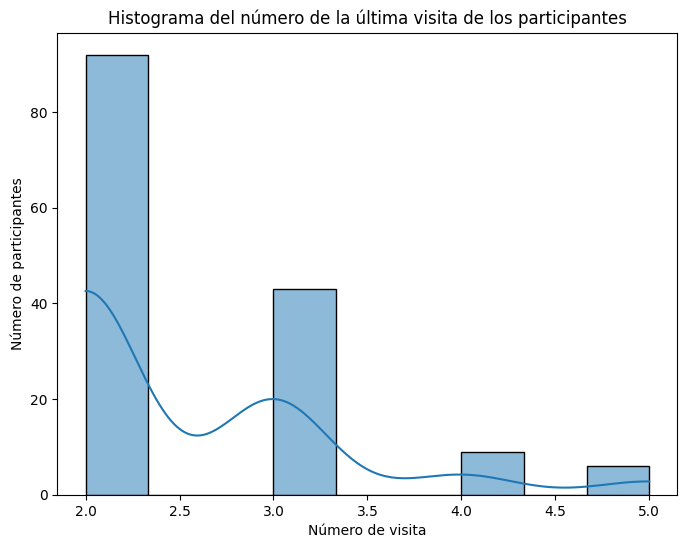

In [61]:
# - ¿Cuál es la última visita de los participantes?
df_last_visit = df_dementia_dataset_treated_copy.groupby('Subject ID')['Visit'].max().reset_index()

plt.figure(figsize=(8, 6))
sns.histplot(df_last_visit['Visit'], kde=True)
plt.title('Histograma del número de la última visita de los participantes')
plt.xlabel('Número de visita')
plt.ylabel('Número de participantes')
plt.show()

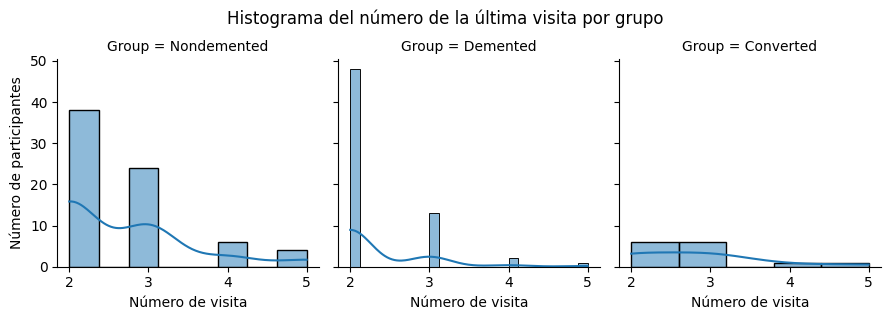

In [62]:
# LAST VISIT PER GROUP
df_last_visit = df_dementia_dataset_treated_copy.groupby(['Subject ID', 'Group'])['Visit'].max().reset_index()

# SEPARATE HISTOGRAMES FOR EACH GROUP
g = sns.FacetGrid(df_last_visit, col="Group", margin_titles=True)
g.map(sns.histplot, "Visit", kde=True)
g.fig.suptitle('Histograma del número de la última visita por grupo', y=1.05)
g.set_axis_labels("Número de visita", "Número de participantes")
plt.show()

In [63]:
# FREQUENCY
print(df_last_visit['Group'].value_counts())

Group
Nondemented    72
Demented       64
Converted      14
Name: count, dtype: int64


In [64]:
# FREQUENCY
print(df_last_visit_2['Group'].value_counts())

Group
Nondemented    70
Demented       62
Converted      12
Name: count, dtype: int64


In [65]:
# FREQUENCY
print(df_last_visit_3['Group'].value_counts())

Group
Nondemented    34
Demented       16
Converted       8
Name: count, dtype: int64


### Ejercicio 2

**(1 punto)**


a) Crea un mapa de correlaciones entre les variables relevantes del estudio (las mencionadas en el apartado a) más la edad, la educación y el status socioeconómico (SES)). ¿Puedes ver correlaciones significativas entre ellas? Muestra el valor de la correlación con dos decimales. **(0.5 puntos)**



       M/F   Age  EDUC   SES  MMSE   CDR  eTIV  nWBV   ASF
M/F   1.00 -0.04  0.09 -0.05 -0.17  0.20  0.57 -0.25 -0.56
Age  -0.04  1.00 -0.03 -0.05  0.06 -0.03  0.04 -0.52 -0.04
EDUC  0.09 -0.03  1.00 -0.69  0.19 -0.15  0.26 -0.01 -0.24
SES  -0.05 -0.05 -0.69  1.00 -0.14  0.05 -0.25  0.09  0.24
MMSE -0.17  0.06  0.19 -0.14  1.00 -0.68 -0.03  0.34  0.04
CDR   0.20 -0.03 -0.15  0.05 -0.68  1.00  0.02 -0.34 -0.03
eTIV  0.57  0.04  0.26 -0.25 -0.03  0.02  1.00 -0.21 -0.99
nWBV -0.25 -0.52 -0.01  0.09  0.34 -0.34 -0.21  1.00  0.21
ASF  -0.56 -0.04 -0.24  0.24  0.04 -0.03 -0.99  0.21  1.00



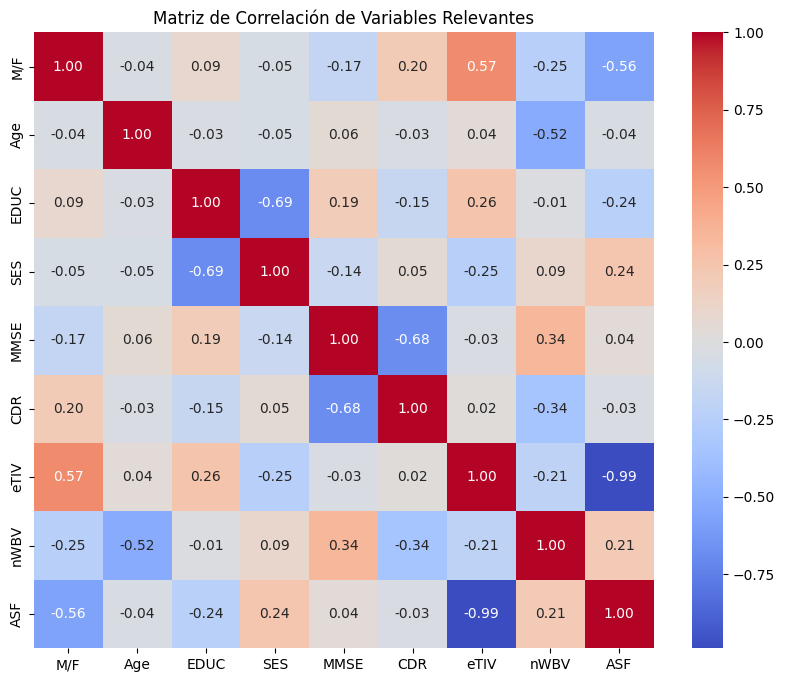

In [66]:
# RELEVANT COLUMNS FOR CORRELATION ANALYSIS
relevant_columns = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df_correlation_data = df_dementia_dataset_treated_copy[relevant_columns]

# COPY OF THE correlation_data
df_correlation_data_encoded = df_correlation_data.copy()

# ENCODE THE 'M/F' COLUMN TO NUMERICAL VALUES (0 FOR 'F' AND 1 FOR 'M')
df_correlation_data_encoded['M/F'] = df_correlation_data_encoded['M/F'].map({'F': 0, 'M': 1})

# CALCULATE THE CORRELATION MATRIX (dataframe) WITH THE ENCODED DATA
correlation_matrix = df_correlation_data_encoded.corr()

# CORRELATION MATRIX WITH TWO DECIMAL PLACES
print(f"{correlation_matrix.round(2)}\n")

# CORRELATION MATRIX USING A HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Variables Relevantes")
plt.show()

Correlaciones significativas:

Positive Correlations:
- `M/F` and `eTIV` (0.57)

Negative Correlations:
- `MMSE` and `CDR` (-0.68)
- `M/F` and `ASF` (-0.56)
- `Age` and `nWBV` (-0.52)
- `eTIV` and `ASF` (-0.99)



b) Centrándonos en la 1a visita, ¿hay diferencias significativas entre los participantes dementes y los no dementes respecto las variables cognitivas? ¿Y en las variables estructurales? Muestra las diferencias gráficamente. **(0.5 puntos)**

**Nota1**: Para este apartado puedes ignorar los participantes "Converted".


In [67]:
# FILTER DATA FOR THE 1ST VISIT SO WE REuse DF_FIRST_VISIT_DATA
df_first_visit_data = df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit'] == 1]
df_first_visit_data.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0   OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
2   OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
5   OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
7   OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
10  OAS2_0007  OAS2_0007_MR1     Demented      1         0   M    R   71   

    EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0     14  2.0  27.0  0.0  1987  0.696  0.883  
2     12  2.0  23.0  0.5  1678  0.736  1.046  
5     18  3.0  28.0  0.0  1215  0.710  1.444  
7     12  4.0  28.0  0.0  1689  0.712  1.039  
10    16  2.0  28.0  0.5  1357  0.748  1.293

In [68]:
# Separate data by group (Demented/Nondemented)
df_demented_group = df_first_visit_data[df_first_visit_data['Group'] == 'Demented']
df_nondemented_group = df_first_visit_data[df_first_visit_data['Group'] == 'Nondemented']

In [69]:
# cognitive and structural variables
cognitive_variables = ['MMSE', 'CDR']
structural_variables = ['eTIV', 'nWBV', 'ASF']

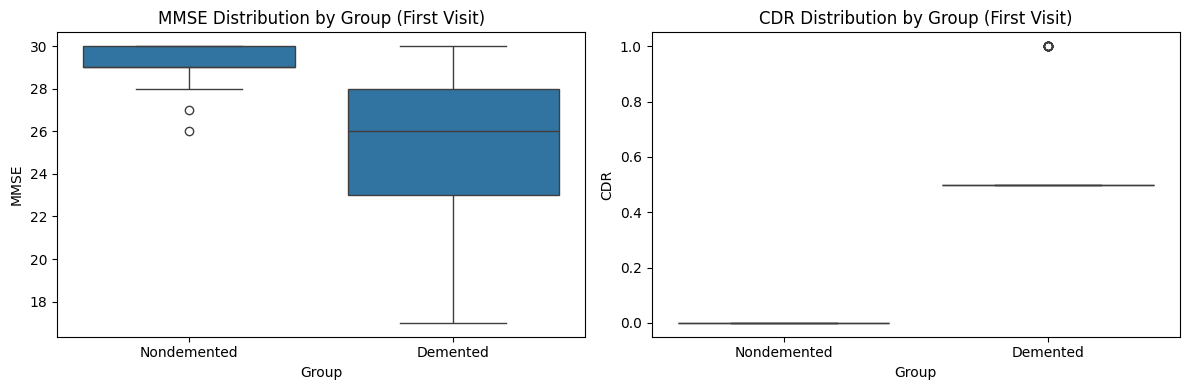

In [70]:
# Cognitive variables
fig, axes = plt.subplots(1, len(cognitive_variables), figsize=(12, 4))

for i, variable in enumerate(cognitive_variables):
    sns.boxplot(x='Group', y=variable, data=df_first_visit_data[df_first_visit_data['Group'] != 'Converted'], ax=axes[i]) # EXCLUDE CONVERTED
    axes[i].set_title(f'{variable} Distribution by Group (First Visit)')

plt.tight_layout()
plt.show()

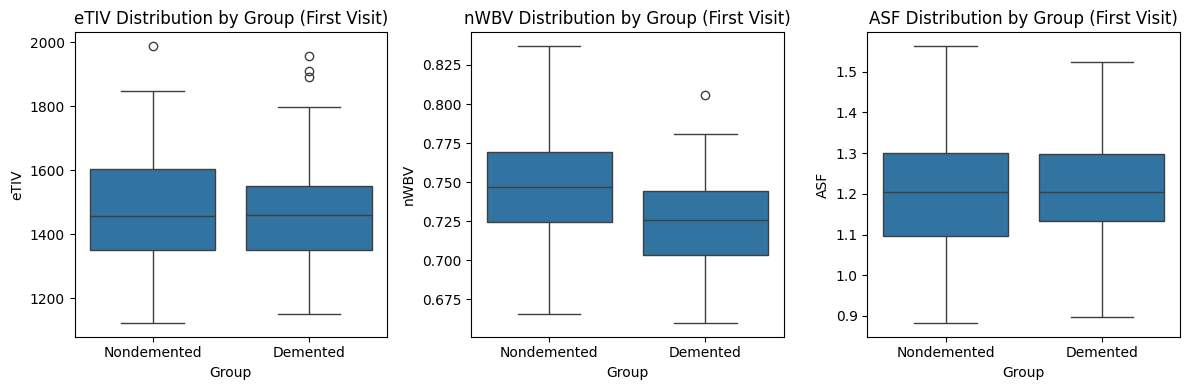

In [71]:
# Structural variables
fig, axes = plt.subplots(1, len(structural_variables), figsize=(12, 4))

for i, variable in enumerate(structural_variables):
    sns.boxplot(x='Group', y=variable, data=df_first_visit_data[df_first_visit_data['Group'] != 'Converted'], ax=axes[i])  # EXCLUDE CONVERTED
    axes[i].set_title(f'{variable} Distribution by Group (First Visit)')

plt.tight_layout()
plt.show()

Yes, there are significant differences between demented and nondemented participants regarding both cognitive ('MMSE' & 'CDR') and structural variables ('eTIV', 'nWBV', & 'ASF'). For the Cognitive Variables, we can see that Demented patients exhibit substantially lower MMSE scores, reflecting significant cognitive impairment and have higher CDR scores, indicating greater severity of dementia. While for the Structural Variables, the Demented patients appear to have a noticeably smaller normalized whole brain volumes. The eTIV for both demented and non-demented participants does not show a significant difference between them.


c) A continuación queremos estudiar la progresión de la demencia entre la 1a y la 2a visita. Para eso, vamos a calcular una variable delta para cada variable cognitiva y estructural. Esta nueva variable nos dará información sobre el cambio en estas variables entre la 1a y la 2a visita. Crea estas nuevas variables y muestra gráficamente y con estadísticos básicos (media y desviación estándard) las diferencias entre grupos. Explica y interpreta los resultados obtenidos. **Opcional**

**Nota2**: Para este apartado puedes considerar también los participantes "Converted".


In [72]:
# FILTER 1ST & 2ND VISIST
df_first_visit_data = df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit'] == 1]
df_second_visit_data = df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit'] == 2]

# MERGE THEM ON 'SUBJECT_ID'
df_merged_data = pd.merge(df_first_visit_data, df_second_visit_data, on='Subject ID', suffixes=('_1', '_2'))

# CALCULATE DELTA VARIABLES FOR COGNITIVE & STRUCTURAL VARIABLES
cognitive_variables = ['MMSE', 'CDR']
structural_variables = ['eTIV', 'nWBV', 'ASF']

for variable in cognitive_variables + structural_variables:
    df_merged_data[f'Delta_{variable}'] = df_merged_data[f'{variable}_2'] - df_merged_data[f'{variable}_1']

# HEAD WITH DELTA VARIABLES
df_merged_data.head()

Subject ID       MRI ID_1      Group_1  Visit_1  MR Delay_1 M/F_1 Hand_1  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented        1           0     M      R   
1  OAS2_0002  OAS2_0002_MR1     Demented        1           0     M      R   
2  OAS2_0004  OAS2_0004_MR1  Nondemented        1           0     F      R   
3  OAS2_0005  OAS2_0005_MR1  Nondemented        1           0     M      R   
4  OAS2_0008  OAS2_0008_MR1  Nondemented        1           0     F      R   

   Age_1  EDUC_1  SES_1  ...  MMSE_2  CDR_2  eTIV_2  nWBV_2  ASF_2 Delta_MMSE  \
0     87      14    2.0  ...    30.0    0.0    2004   0.681  0.876        3.0   
1     75      12    2.0  ...    28.0    0.5    1738   0.713  1.010        5.0   
2     88      18    3.0  ...    27.0    0.0    1200   0.718  1.462       -1.0   
3     80      12    4.0  ...    29.0    0.5    1701   0.711  1.032        1.0   
4     93      14    2.0  ...    29.0    0.0    1257   0.703  1.396       -1.0   

  Delta_CDR  Delta_eTIV  Delta_nWBV Delta_ASF  
0       0.0          17      -0.015    -0.007  
1       0.0          60      -0.023    -0.036  
2       0.0         -15       0.008     0.018  
3       0.5          12      -0.001    -0.007  
4       0.0         -15       0.005     0.016  

[5 rows x 34 columns]

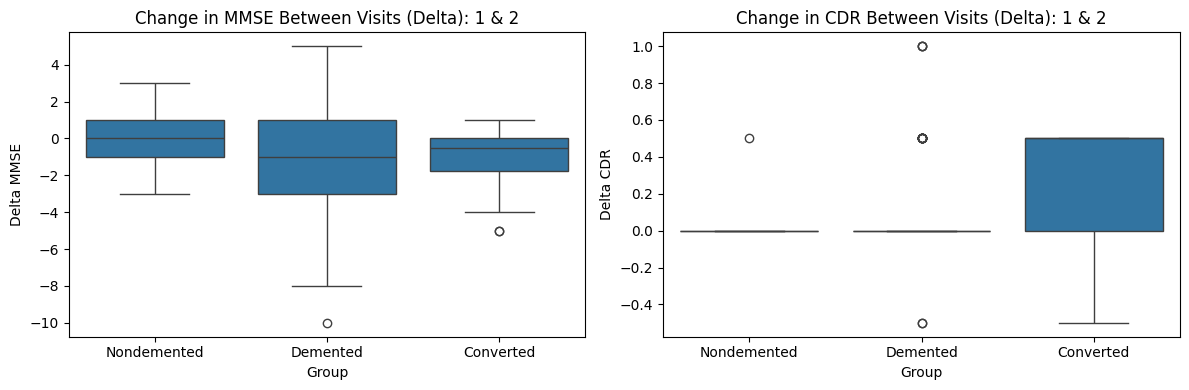

In [73]:
# Boxplots for cognitive variables
fig, axes = plt.subplots(1, len(cognitive_variables), figsize=(12, 4))

for i, variable in enumerate(cognitive_variables):
    sns.boxplot(x='Group_1', y=f'Delta_{variable}', data=df_merged_data, ax=axes[i]) # Using 'Group_1' for grouping
    axes[i].set_title(f'Change in {variable} Between Visits (Delta): 1 & 2')
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel(f'Delta {variable}')

plt.tight_layout()
plt.show()

Comprarando este boxplot (converted + contiene Delta variables) con el otro boxplot (no incluye converted ni Delta)

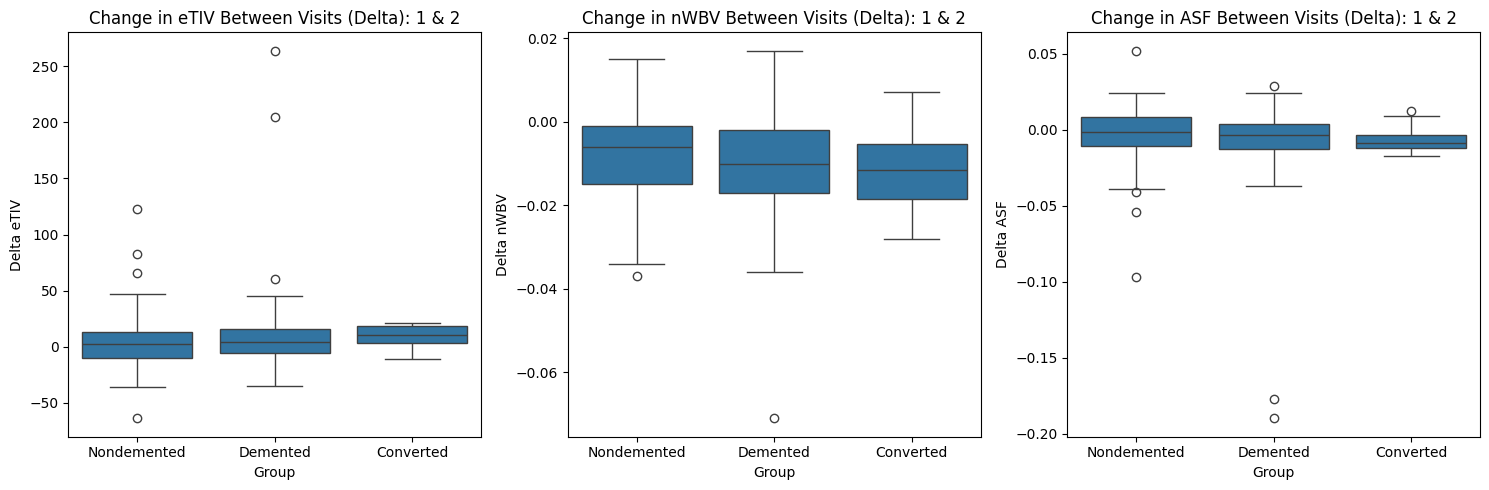

In [74]:
# Boxplots for structural variables
fig, axes = plt.subplots(1, len(structural_variables), figsize=(15, 5))  # 1 row, n cols

for i, variable in enumerate(structural_variables):
    sns.boxplot(x='Group_1', y=f'Delta_{variable}', data=df_merged_data, ax=axes[i])
    axes[i].set_title(f'Change in {variable} Between Visits (Delta): 1 & 2')
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel(f'Delta {variable}')

plt.tight_layout()
plt.show()

In [75]:
# MEAN & STANDARD DEVIATION FOR DELTA VARIABLES BY GROUP
for variable in cognitive_variables + structural_variables:
    print(f"Delta {variable} Statistics:")
    print(df_merged_data.groupby('Group_1')[f'Delta_{variable}'].agg(['mean', 'std']))  # Using 'Group_1' for grouping
    print("\n")

Delta MMSE Statistics:
                 mean       std
Group_1                        
Converted   -1.333333  2.103388
Demented    -0.929963  3.091984
Nondemented -0.071429  1.081081


Delta CDR Statistics:
                 mean       std
Group_1                        
Converted    0.291667  0.334279
Demented     0.120968  0.295949
Nondemented  0.007143  0.059761


Delta eTIV Statistics:
                  mean        std
Group_1                          
Converted     8.333333  11.372481
Demented     12.983871  44.865735
Nondemented   5.171429  25.870341


Delta nWBV Statistics:
                 mean       std
Group_1                        
Converted   -0.011833  0.010886
Demented    -0.011032  0.013528
Nondemented -0.007757  0.010074


Delta ASF Statistics:
                 mean       std
Group_1                        
Converted   -0.006167  0.009806
Demented    -0.010226  0.034736
Nondemented -0.003514  0.019832




### Ejercicio 3

**(2.5 puntos)**

Para finalizar el estudio vamos a crear un modelo de aprendizaje automático supervisado para comprobar si las variables estudiadas son relevantes para diferenciar participantes dementes y no dementes.

a) Primero de todo, selecciona los datos de la **1a visita**. En el caso de los participantes "Converted", en la 1a visita aún eran no dementes, así que vamos a cambiar su grupo a Nondemented. A continuación, codifica esta variable como 0 (Nondemented) y 1 (Demented). **(0.5 puntos)**




In [76]:
# 1ST VISIT DATAFRAME (REUSING FROM EX. 1& 2)
df_first_visit_data = df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Visit'] == 1]

In [77]:
# "Converted" & "Nondemented"
df_first_visit_data.loc[df_first_visit_data['Group'] == 'Converted', 'Group'] = 'Nondemented'

In [78]:
# 'Group' COLUMN TO NUMERICAL VALUES
df_first_visit_data['Group_Encoded'] = df_first_visit_data['Group'].map({'Nondemented': 0, 'Demented': 1})

# ORGNIZED 'Group_Encoded' SO THAT IS BETWEEN  'Group' &  'Visit'
new_column_order = ['Subject ID', 'Group', 'Group_Encoded', 'Visit', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df_reordered = df_first_visit_data[new_column_order]
df_first_visit_data = df_reordered # ASSIGNED TO  df_first_visit_data

# UPDATED DATAFRAME HEAD
df_first_visit_data.head()

Subject ID        Group  Group_Encoded  Visit M/F  Age  EDUC  SES  MMSE  \
0   OAS2_0001  Nondemented              0      1   M   87    14  2.0  27.0   
2   OAS2_0002     Demented              1      1   M   75    12  2.0  23.0   
5   OAS2_0004  Nondemented              0      1   F   88    18  3.0  28.0   
7   OAS2_0005  Nondemented              0      1   M   80    12  4.0  28.0   
10  OAS2_0007     Demented              1      1   M   71    16  2.0  28.0   

    CDR  eTIV   nWBV    ASF  
0   0.0  1987  0.696  0.883  
2   0.5  1678  0.736  1.046  
5   0.0  1215  0.710  1.444  
7   0.0  1689  0.712  1.039  
10  0.5  1357  0.748  1.293

b) En este modelo vamos a usar las variables cognitivas y estructurales estudiadas en los apartados anteriores, junto con las variables demográficas (edad, género y educación). Como ya sabes, antes de introducirlas en el modelo, se tienen que transformar (codificar variables categóricas, estandarizar variables numéricas, etc). Aplica las transformaciones que consideres adecuadas. **(0.5 puntos)**



In [79]:
# CATEGORICAL VARIABLE.
# df_first_visit_data['M/F_Encoded'] ->  store the encoded values of the M/F column.
# .map: mapping function
df_first_visit_data['M/F_Encoded'] = df_first_visit_data['M/F'].map({'F': 0, 'M': 1}) # ENCODE

In [80]:
from sklearn.preprocessing import StandardScaler

# Numerical Features TO STANDARDIZE:
numerical_features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

"""
cognitive and structural variables
cognitive_variables = ['MMSE', 'CDR']
structural_variables = ['eTIV', 'nWBV', 'ASF']
"""

# CREATE STANDARDSCALER OBJECT:
scaler = StandardScaler()

# FIT & TRANSFORM:
df_first_visit_data[numerical_features] = scaler.fit_transform(df_first_visit_data[numerical_features])

In [81]:
df_first_visit_data.head()

Subject ID        Group  Group_Encoded  Visit M/F       Age      EDUC  \
0   OAS2_0001  Nondemented              0      1   M  1.536301 -0.186147   
2   OAS2_0002     Demented              1      1   M -0.059395 -0.884199   
5   OAS2_0004  Nondemented              0      1   F  1.669276  1.209957   
7   OAS2_0005  Nondemented              0      1   M  0.605478 -0.884199   
10  OAS2_0007     Demented              1      1   M -0.591294  0.511905   

         SES      MMSE       CDR      eTIV      nWBV       ASF  M/F_Encoded  
0  -0.424437 -0.189281 -0.799590  2.944121 -1.102837 -2.353155            1  
2  -0.424437 -1.541291  0.738083  1.169285 -0.002018 -1.166874            1  
5   0.485071  0.148721 -0.799590 -1.490096 -0.717550  1.729691            0  
7   1.394580  0.148721 -0.799590  1.232467 -0.662509 -1.217819            1  
10 -0.424437  0.148721  0.738083 -0.674476  0.328227  0.630743            1

c) Usa el modelo de clasificación que más te guste para clasificar los participantes en dementes o no dementes según sus características. Muestra las métricas de *performance*. ¿Es el modelo bueno para descriminar entre los dos tipos de participantes? ¿Qué variables son más importantes?  **Interpreta y comenta los resultados.** **(1 punto)**

**Nota**: Excluye la variable `CDR`, ya que una escala clínica directamente relacionada con la demencia.



In [82]:
# RANDOM FOREST
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

In [83]:
# Define features and target variable
features = ['M/F_Encoded', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
target = 'Group_Encoded'

# Split data into training and testing sets
X = df_first_visit_data[features]
y = df_first_visit_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [84]:
# Create and train the model
model = RandomForestClassifier(random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
importances = model.feature_importances_

# Loop through features and their importances
for i, feature in enumerate(features):
    print(f"{feature}: {importances[i]}")

print(f"Accuracy: {accuracy}\n")
print(classification_report(y_test, y_pred))
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}/n")

M/F_Encoded: 0.0577195839615384
Age: 0.10090279923173728
EDUC: 0.11554944676941252
SES: 0.05268898463178015
MMSE: 0.3290974921720581
eTIV: 0.11299743155312798
nWBV: 0.12046074591834918
ASF: 0.1105835157619964
Accuracy: 0.8333333333333334

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.62      1.00      0.76         8

    accuracy                           0.83        30
   macro avg       0.81      0.89      0.82        30
weighted avg       0.90      0.83      0.84        30

Precision: 0.6153846153846154
Recall: 1.0
F1-score: 0.7619047619047619
Confusion Matrix:
[[17  5]
 [ 0  8]]/n


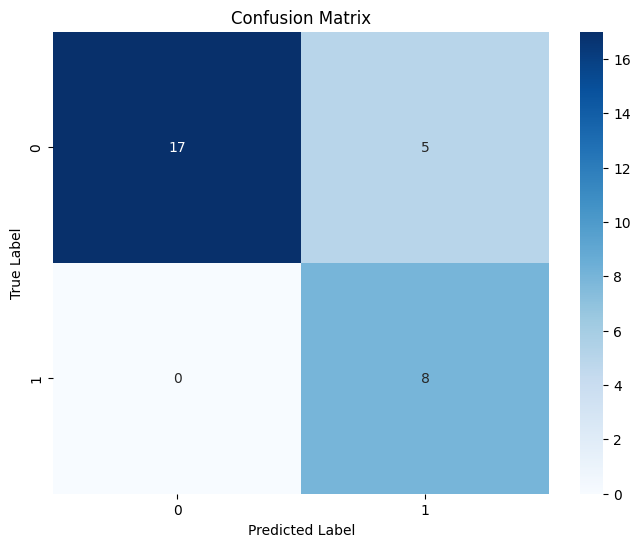

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The Random Forest model achieved an overall accuracy of approximately 83.0% in classifying participants as demented or non-demented. For the "Nondemented" class, it showed a recall of 77% and an F1 score of 0.87. For the "Demented" class, the model had a recall of 100% and an F1 score of 0.76. We can see that the most important variables in this model, based on their impact on predictions, were MMSE (0.3239), followed by nWBV (0.1285), EDUC (0.1155), and eTIV (0.1130).

e) Hay modelos, como el Random Forest, que permiten obtener la probabilidad asociada a la predicción mediante la función [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Esta información se puede usar para establecer distintos niveles. En nuestro caso, vamos a usar esta probabilidad para definir 3 niveles de riesgo: riesgo bajo (<0.33), riesgo medio (<0.66) y riesgo alto (>=0.66). ¿Que nivel de riesgo tienen los participantes que luego desarrollaron demencia (Converted)? Interpreta y razona la respuesta. **(0.5 punto)**

In [87]:
# PROB. FOR ALL FOR 1st VISIT
# # USING THE 1ST VISIT RESULTS
probabilidades = model.predict_proba(df_first_visit_data[features])[:, 0]  # Probabilidad de la clase 'Nondemented' (0)

# RISK LEVELS
niveles_riesgo = []
for prob in probabilidades:
    if prob < 0.33:
        niveles_riesgo.append('Bajo')
    elif prob < 0.66:
        niveles_riesgo.append('Medio')
    else:
        niveles_riesgo.append('Alto')

# ADD THE RISKS LEVELS TO THE OG DF 1ST VISIT
df_first_visit_data['Nivel_Riesgo'] = niveles_riesgo

# Calculate developed_dementia_ids
developed_dementia_ids = df_dementia_dataset_treated_copy.groupby('Subject ID')['Group'].agg(lambda x: (x == 'Converted').any())
developed_dementia_ids = developed_dementia_ids[developed_dementia_ids].index.tolist()

# Filter df_first_visit_data for participants who later developed dementia
converted_participants_first_visit = df_first_visit_data[df_first_visit_data['Subject ID'].isin(developed_dementia_ids)]

# Analyze risk levels at the FIRST VISIT
risk_levels_converted = converted_participants_first_visit['Nivel_Riesgo'].value_counts()
print(risk_levels_converted)
print(converted_participants_first_visit)

Nivel_Riesgo
Alto     12
Medio     2
Name: count, dtype: int64
    Subject ID        Group  Group_Encoded  Visit M/F       Age      EDUC  \
33   OAS2_0018  Nondemented              0      1   F  1.536301 -0.186147   
36   OAS2_0020  Nondemented              0      1   M  0.605478  1.908009   
57   OAS2_0031  Nondemented              0      1   F  1.403326 -0.884199   
81   OAS2_0041  Nondemented              0      1   F -0.591294  0.511905   
114  OAS2_0054  Nondemented              0      1   F  1.270352  1.209957   
194  OAS2_0092  Nondemented              0      1   F  1.004402 -0.884199   
218  OAS2_0103  Nondemented              0      1   F -0.857244  0.511905   
245  OAS2_0118  Nondemented              0      1   F -1.123193 -0.186147   
261  OAS2_0127  Nondemented              0      1   M  0.472503  1.209957   
271  OAS2_0131  Nondemented              0      1   F -1.389142 -0.884199   
273  OAS2_0133  Nondemented              0      1   F  0.339529 -0.884199   
295  OAS2_014

In [88]:
# CHECK SUBJECT: 'OAS2_0127'
subject_id_to_check = 'OAS2_0127'
filtered_data = df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Subject ID'] == subject_id_to_check]
print(filtered_data)

    Subject ID         MRI ID      Group  Visit  MR Delay M/F Hand  Age  EDUC  \
261  OAS2_0127  OAS2_0127_MR1  Converted      1         0   M    R   79    18   
262  OAS2_0127  OAS2_0127_MR2  Converted      2       851   M    R   81    18   
263  OAS2_0127  OAS2_0127_MR3  Converted      3      1042   M    R   81    18   
264  OAS2_0127  OAS2_0127_MR4  Converted      4      2153   M    R   84    18   
265  OAS2_0127  OAS2_0127_MR5  Converted      5      2639   M    R   86    18   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
261  1.0  29.0  0.0  1644  0.729  1.067  
262  1.0  29.0  0.5  1654  0.720  1.061  
263  1.0  29.0  0.5  1647  0.717  1.066  
264  1.0  29.0  0.5  1668  0.694  1.052  
265  1.0  30.0  0.5  1670  0.669  1.051  


In [89]:
# CHECK SUBJECT: 'OAS2_0018'
subject_id_to_check = 'OAS2_0018'
filtered_data = df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Subject ID'] == subject_id_to_check]
print(filtered_data)

   Subject ID         MRI ID      Group  Visit  MR Delay M/F Hand  Age  EDUC  \
33  OAS2_0018  OAS2_0018_MR1  Converted      1         0   F    R   87    14   
34  OAS2_0018  OAS2_0018_MR3  Converted      3       489   F    R   88    14   
35  OAS2_0018  OAS2_0018_MR4  Converted      4      1933   F    R   92    14   

    SES  MMSE  CDR  eTIV   nWBV    ASF  
33  1.0  30.0  0.0  1406  0.715  1.248  
34  1.0  29.0  0.0  1398  0.713  1.255  
35  1.0  27.0  0.5  1423  0.696  1.234  


In [90]:
# CHECK SUBJECT: 'OAS2_0177'
subject_id_to_check = 'OAS2_0177'
filtered_data = df_dementia_dataset_treated_copy[df_dementia_dataset_treated_copy['Subject ID'] == subject_id_to_check]
print(filtered_data)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
349  OAS2_0177  OAS2_0177_MR1  Nondemented      1         0   M    R   68   
350  OAS2_0177  OAS2_0177_MR2  Nondemented      2       665   M    R   70   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
349    14  3.0  26.0  0.0  1444  0.778  1.216  
350    14  3.0  28.0  0.0  1510  0.770  1.162  


The risk classification system used suggests that most individuals who effectively developed dementia were identified with an elevated risk before or at the time of their classification as demented. Probably done during visit 2 &/or 3. However, the "Medium" risk case indicates that not all those who developed dementia were initially categorized with a "High" risk.